# Regresión logística para predicciones bancarias

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importo Data

### Información de dataset
- job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- default: has credit in default? (categorical: "no","yes","unknown")
- housing: has housing loan? (categorical: "no","yes","unknown")
- loan: has personal loan? (categorical: "no","yes","unknown")


**related with the last contact of the current campaign:**
- contact: contact communication type (categorical: "cellular","telephone")
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


**other attributes:**
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


**social and economic context attributes**
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


**Output variable (desired target):**
- y - has the client subscribed a term deposit? (binary: "yes","no")

In [146]:
data = pd.read_csv("bank.csv", sep=";")

In [148]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [150]:
data.shape

(4119, 21)

In [152]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## Divido tabla en test y train

In [155]:
from sklearn.model_selection import train_test_split

X = data.loc[:,data.columns!="y"]
y = data.loc[:,"y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size = 0.75, 
    test_size = 0.25
)

In [157]:
X_train.shape

(3089, 20)

In [159]:
X_test.shape

(1030, 20)

## Limpieza de datos

### Convierto las columnas de "yes" y "no" en un binario (0 o 1)

In [163]:
y_train.unique()

array(['no', 'yes'], dtype=object)

In [165]:
y_train = np.where(y_train=="yes", 1, 0)
y_test = np.where(y_test=="yes", 1, 0)

X_train["default"] = np.where(X_train["default"]=="yes", 1, 0)
X_test["default"] = np.where(X_test["default"]=="yes", 1, 0)

In [167]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [169]:
X_train["default"].unique()

array([0, 1])

### Modifico columna de educacion para no quedarme con datos ambiguos al generar dummy


Modificacion de columnas pre-dummies

In [173]:
X_train["education"].unique()

array(['high.school', 'university.degree', 'professional.course',
       'basic.9y', 'basic.6y', 'unknown', 'basic.4y'], dtype=object)

In [175]:
X_train["education"] = X_train["education"].replace(
    {
        "basic.4y": "Basic",
        "basic.6y": "Basic",
        "basic.9y": "Basic",
        "high.school": "High School",
        "high.school": "High School",
        "professional.course": "Professional Course",
        "university.degree": "University Degree",
        "illiterate": "Illiterate",
        "unknown": "Unknown"
    }
)

X_test["education"] = X_test["education"].replace(
    {
        "basic.4y": "Basic",
        "basic.6y": "Basic",
        "basic.9y": "Basic",
        "high.school": "High School",
        "high.school": "High School",
        "professional.course": "Professional Course",
        "university.degree": "University Degree",
        "illiterate": "Illiterate",
        "unknown": "Unknown"
    }
)

In [177]:
X_train["education"].unique()

array(['High School', 'University Degree', 'Professional Course', 'Basic',
       'Unknown'], dtype=object)

In [179]:
X_test["education"].unique()

array(['High School', 'Unknown', 'Basic', 'University Degree',
       'Professional Course', 'Illiterate'], dtype=object)

### Conversión de las variables categóricas a dummies

Identifico las variables categoricas, las mismas son:

["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]

In [183]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [185]:
X_train = pd.get_dummies(
    X_train, 
    columns=["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"],
    drop_first = True
)

X_test = pd.get_dummies(
    X_test, 
    columns=["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"],
    drop_first = True
)

In [187]:
X_train.columns

Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_High School', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [189]:
X_test.columns

Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

#### Verifico que tengan mismas columnas

In [192]:
X_train.columns.size == X_test.columns.size

False

In [194]:
# busco columna que no esté en la tabla
acum = []
for i in X_test.columns:
    if i not in X_train.columns:
        acum.append(i)

acum

['education_Illiterate']

In [196]:
X_train

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
4048,42,0,228,2,999,1,-1.8,92.893,-46.2,1.281,...,True,False,False,False,False,False,False,True,False,False
669,37,0,44,2,999,0,-1.8,93.075,-47.1,1.410,...,False,False,False,False,False,True,False,False,True,False
3848,29,0,83,4,999,0,-0.1,93.200,-42.0,4.021,...,False,True,False,False,False,False,False,False,True,False
1784,36,0,88,2,999,0,-0.1,93.200,-42.0,4.191,...,False,True,False,False,True,False,False,False,True,False
2579,28,0,226,3,999,1,-1.7,94.027,-38.3,0.898,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,44,0,296,1,999,0,-1.8,92.893,-46.2,1.291,...,True,False,False,False,False,False,True,False,True,False
2302,35,0,356,3,999,0,1.4,93.918,-42.7,4.962,...,False,False,False,False,True,False,False,False,True,False
31,33,0,393,3,999,0,1.4,94.465,-41.8,4.865,...,False,False,False,False,True,False,False,False,True,False
2649,36,0,508,4,999,0,1.4,93.444,-36.1,4.964,...,False,False,False,False,False,False,False,False,True,False


In [198]:
# vamos a eliminarlas de testing para simplificar el problema.
X_test.drop(columns = ['education_Illiterate'],inplace = True)

In [200]:
X_train.columns.size == X_test.columns.size

True

# Analisis Predictivo

## Selección variables para el modelo

In [204]:
len(X_train.columns)

49

In [206]:
n = 12

In [208]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [210]:
lr = LogisticRegression(max_iter=1000000)

In [212]:
X_train.head()

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
4048,42,0,228,2,999,1,-1.8,92.893,-46.2,1.281,...,True,False,False,False,False,False,False,True,False,False
669,37,0,44,2,999,0,-1.8,93.075,-47.1,1.410,...,False,False,False,False,False,True,False,False,True,False
3848,29,0,83,4,999,0,-0.1,93.200,-42.0,4.021,...,False,True,False,False,False,False,False,False,True,False
1784,36,0,88,2,999,0,-0.1,93.200,-42.0,4.191,...,False,True,False,False,True,False,False,False,True,False
2579,28,0,226,3,999,1,-1.7,94.027,-38.3,0.898,...,False,False,False,False,True,False,False,False,False,False


In [214]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [215]:
print(rfe.support_)

[False False False False False False  True  True False False False  True
 False False  True False  True False False False False False False False
 False False False False False False False  True False  True  True  True
 False False  True  True False False False False False False False False
  True]


In [216]:
tabla_columnas = pd.DataFrame({
    "columna": X_train.columns, 
    "SeQueda": rfe.support_,
    "Posicion": rfe.ranking_
})
tabla_columnas.sort_values("Posicion")

,columna,SeQueda,Posicion
48,poutcome_success,True,1
14,job_management,True,1
11,job_blue-collar,True,1
31,loan_unknown,True,1
7,cons.price.idx,True,1
6,emp.var.rate,True,1
33,contact_telephone,True,1
34,month_aug,True,1
35,month_dec,True,1
38,month_mar,True,1


In [217]:
X_train_final = X_train.loc[:,rfe.support_]
X_test_final = X_test.loc[:,rfe.support_]

## Creo el modelo

In [219]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_final, y_train)

LogisticRegression(max_iter=10000)

## Valido el modelo

In [221]:
X_test.loc[:,rfe.support_]

,emp.var.rate,cons.price.idx,job_blue-collar,job_management,job_self-employed,loan_unknown,contact_telephone,month_aug,month_dec,month_mar,month_may,poutcome_success
2265,1.4,93.444,False,False,False,False,False,True,False,False,False,False
985,1.1,93.994,True,False,False,False,True,False,False,False,True,False
3132,-1.8,92.893,True,False,False,False,False,False,False,False,True,False
1575,-1.8,92.893,True,False,False,False,False,False,False,False,True,False
2084,1.4,94.465,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2812,1.4,93.444,False,False,False,False,False,True,False,False,False,False
4022,1.4,94.465,False,False,False,False,True,False,False,False,False,False
494,-1.8,92.893,False,True,False,False,False,False,False,False,True,False
419,1.1,93.994,False,True,False,False,True,False,False,False,True,False


In [222]:
y_pred = logreg.predict(X_test.loc[:,rfe.support_]) # si no se aclara nada, por defecto el threshold es 0.5
y_pred_proba  = logreg.predict_proba(X_test.loc[:,rfe.support_])[:, 1] # obtengo el vector con probabilidades
y_pred_proba

array([0.0502657 , 0.02061575, 0.07470579, ..., 0.06736995, 0.01848524,
       0.03048256])

In [223]:
pd.DataFrame({"y_real" : y_test, "y_pred": y_pred}).groupby(["y_pred", "y_real"]).size().reset_index()

,y_pred,y_real,0
0,0,0,908
1,0,1,91
2,1,0,10
3,1,1,21


## Creo Matriz de confusión

In [225]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [226]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[908,  10],
       [ 91,  21]], dtype=int64)

In [227]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [228]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

### Accuracy

In [230]:
# Accuracy
(TN+TP) / (TN+TP+FN+FP)

0.9019417475728155

In [231]:
(TN + TP) / (TN + TP + FN + FP)

0.9019417475728155

### Sensibilidad

In [247]:
# Sensibilidad Recall o True Positive Rate
TP / (TP + FN)

0.1875

In [249]:
TP / (TP + FN)

0.1875

### Especificidad

In [252]:
# Especificidad True Negative Rate
TN / (TN + FP)

0.9891067538126361

In [254]:
TN / (TN + FP)

0.9891067538126361

## Curva ROC (Receiver Operating Characteristic) 

In [257]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [259]:
# con la función roc_curve automaticamente calcula los valores de
# sensibilidad y 1-especificidad para distintos thresholds
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

In [261]:
# verificar que para un threshold cercano a 0.5, los valores son como los calculados
print(f"Threshold = {threshold[11]}")
print(f"Sensibilidad = {sensibilidad[11]}")
print(f"Especificidad = {1-especificidad_inv[11]}")

Threshold = 0.5956348404813184
Sensibilidad = 0.14285714285714285
Especificidad = 0.9956427015250545


In [263]:
roc_auc_score(y_test, y_pred_proba)

0.7548776455026456

In [265]:
import seaborn as sns

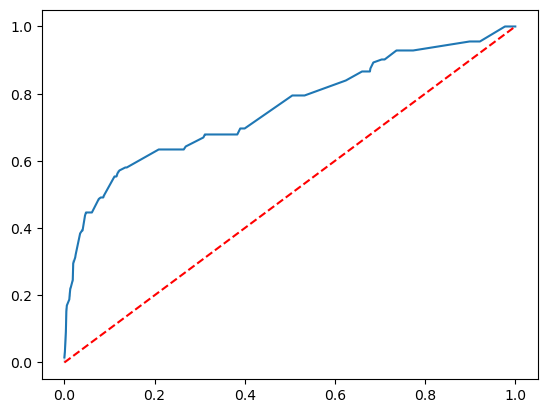

In [267]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")
plt.savefig("1.png") 

### Calcular área abajo de la curva

In [270]:
roc_auc_score(y_test, y_pred_proba)

0.7548776455026456

In [272]:
# 📌 5. Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) # FPR (False Positive Rate) 1-Especificidad y TPR (True Positive Rate) Sensibilidad
roc_auc = auc(fpr, tpr)  # Área bajo la curva (AUC)
roc_auc

0.7548776455026456

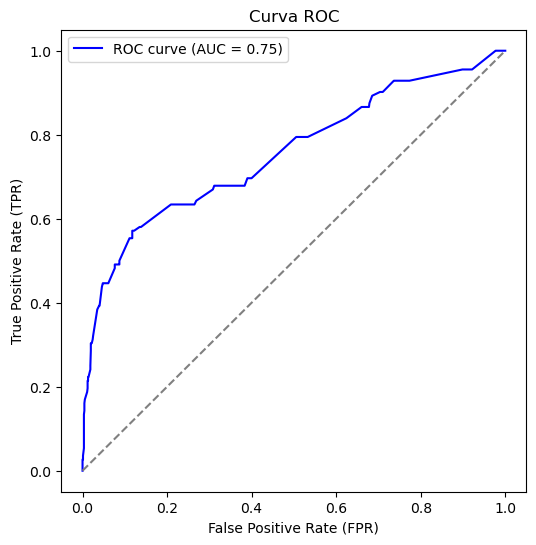

In [274]:
# 📌 6. Graficar la Curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea aleatoria
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.savefig("2.png") 
plt.show()
